In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import seaborn as sb

In [45]:
DF = pd.read_csv("C:\\Users\\Admin\\Downloads\\student_habits_performance.csv",index_col=0)
DF.info()
DF.describe()
DF.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, S1000 to S1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   i

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


"\nplt.imshow(corrMat,interpolation='nearest')\nfor i in range(9):\n    for j in range(9):\n        plt.annotate(str(round(corrMat.values[i][j], 2)),xy=(j, i),ha='center', va='center', color='white')\nplt.xticks(range(len(DF[numCols].columns)),DF[numCols].columns,rotation=90)\nplt.yticks(range(len(DF[numCols].columns)),DF[numCols].columns)\nplt.colorbar()\nplt.show()\ncorrMat\n"

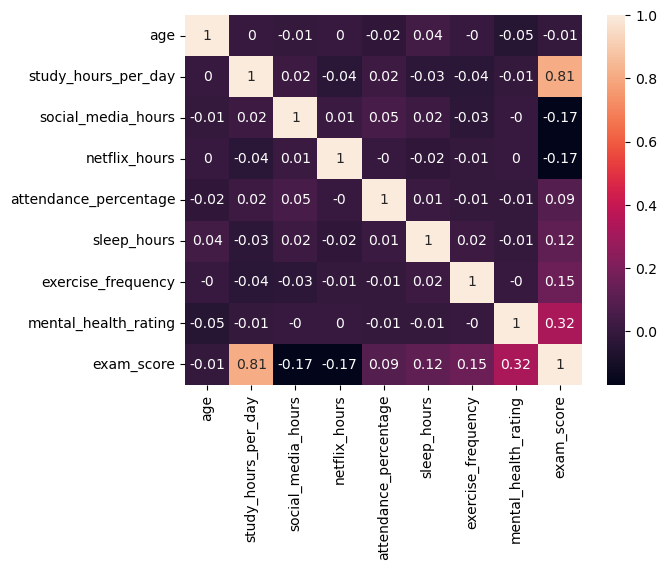

In [ ]:
numCols = []
catCols =[]
ordinalCols = ['']
for i in DF.columns:
    if DF[i].dtype=='int64'or DF[i].dtype=='float64':
        numCols.append(i)
    elif DF[i].dtype=='object':
        catCols.append(i)
corrMat = DF[numCols].corr(method='spearman').map(lambda d:round(d,2))
sb.heatmap(corrMat,annot=True,annot_kws={'size':10})

In [47]:

x = DF[numCols+catCols]
x.drop(columns='exam_score',inplace=True)
y=DF['exam_score']
mode = x['parental_education_level'].mode()[0]
x.fillna({'parental_education_level':mode},inplace=True)
x.drop(columns='age',inplace=True)
x.drop(columns='gender',inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_30332\1833019399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns='exam_score',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_30332\1833019399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna({'parental_education_level':mode},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_30332\1833019399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x

In [48]:
ordinalCols = ['parental_education_level','internet_quality','extracurricular_participation','part_time_job','diet_quality']
trainx,validx,trainy,validy = train_test_split(x,y,train_size=80,random_state=0)
ltrainx =trainx.copy()
lvalidx = validx.copy()
ordEN = OrdinalEncoder()
ltrainx[ordinalCols] = ordEN.fit_transform(ltrainx[ordinalCols])
lvalidx[ordinalCols] = ordEN.transform(lvalidx[ordinalCols])
ltrainx

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
student_id,,,,,,,,,,,,
S1257,3.9,2.9,2.0,79.1,7.6,3,7,0.0,0.0,2.0,1.0,0.0
S1888,3.0,3.0,1.7,79.0,7.4,4,8,1.0,0.0,0.0,1.0,1.0
S1947,4.5,3.2,3.3,70.0,6.3,0,6,1.0,1.0,1.0,1.0,1.0
S1442,2.5,1.7,4.1,91.1,7.6,5,7,0.0,2.0,1.0,0.0,0.0
S1042,3.7,3.4,2.0,88.9,6.8,3,1,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
S1835,5.1,2.6,1.8,83.4,6.5,6,10,0.0,0.0,1.0,0.0,0.0
S1192,4.3,3.3,2.3,86.5,5.5,4,6,0.0,2.0,2.0,1.0,0.0
S1629,5.5,2.7,3.2,91.9,7.3,6,1,1.0,0.0,1.0,1.0,0.0


<Axes: >

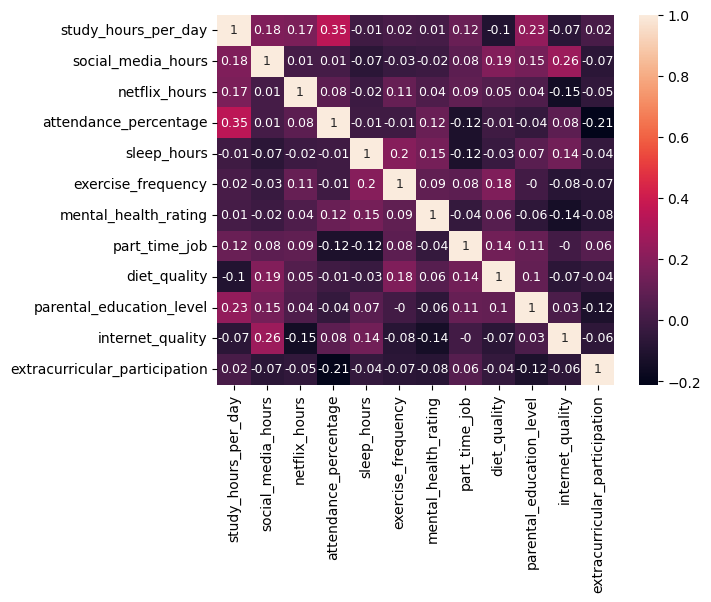

In [49]:
import seaborn as sb
corrMat = ltrainx.corr(method='spearman').map(lambda d:round(d,2))
sb.heatmap(corrMat,annot=True,annot_kws={'size': 9})